In [ ]:
import yfinance as yf

In [ ]:
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import pandas as pd
import numpy as np
import matplotlib.dates as mpdates


In [ ]:
pip install mplfinance

<ipython-input-89-fa1d637100d7>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


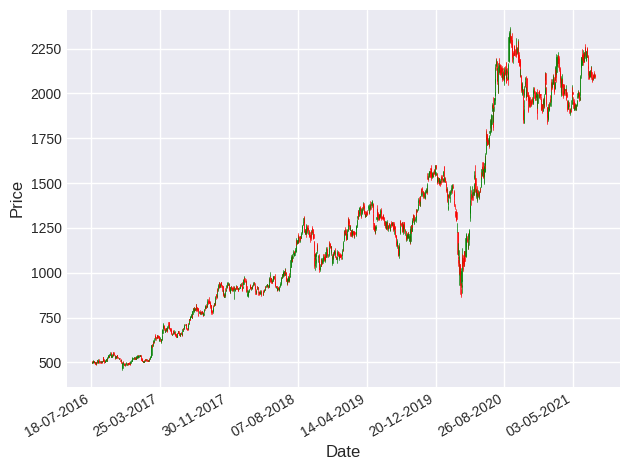

In [ ]:
plt.style.use('seaborn-darkgrid')
df = pd.read_csv('RELIANCE.NS_.csv')
df = df[['Date', 'Open', 'High',
'Low', 'Close']]
df['Date'] = pd.to_datetime(df['Date'])

df['Date'] = df['Date'].map(mpdates.date2num)


fig, ax = plt.subplots()

candlestick_ohlc(ax, df.values, width = 0.6,
colorup = 'green', colordown = 'red',
alpha = 0.8)

ax.grid(True)

ax.set_xlabel('Date')
ax.set_ylabel('Price')

date_format = mpdates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()
plt.show()


In [ ]:
amzn = amzn.loc[pd.Timestamp('2015-01-01'):pd.Timestamp('2019-12-31')]

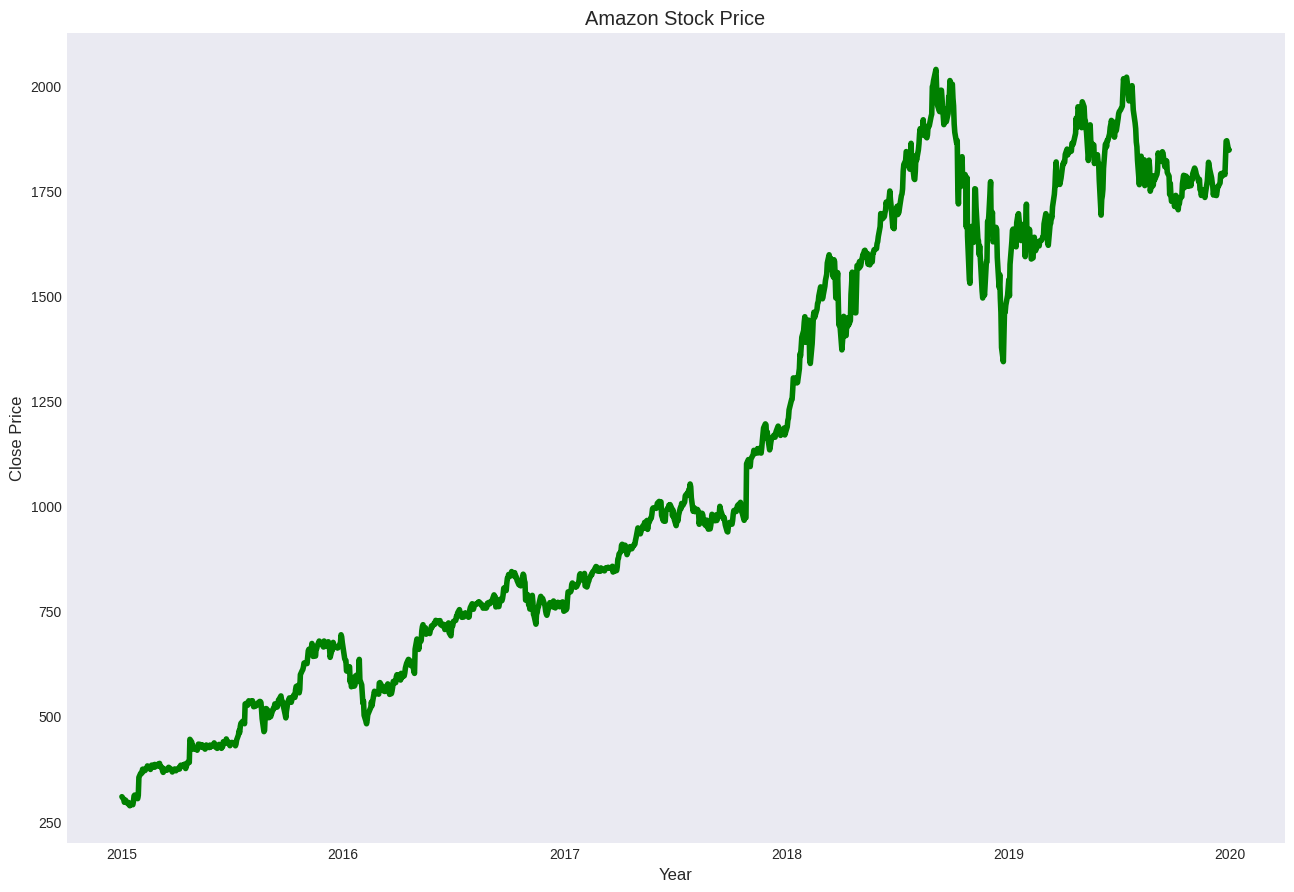

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))

plt.plot(amzn['Close'], color='green')

plt.grid()
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title('Amazon Stock Price')

plt.show()


In [ ]:
daily_close = amzn[['Adj Close']]
daily_pct_c = daily_close.pct_change()
daily_pct_c.fillna(0, inplace=True)
print(daily_pct_c)

            Adj Close
Date                 
2015-01-02   0.000000
2015-01-05  -0.020517
2015-01-06  -0.022833
2015-01-07   0.010600
2015-01-08   0.006836
...               ...
2019-12-24  -0.002114
2019-12-26   0.044467
2019-12-27   0.000551
2019-12-30  -0.012253
2019-12-31   0.000514

[1258 rows x 1 columns]


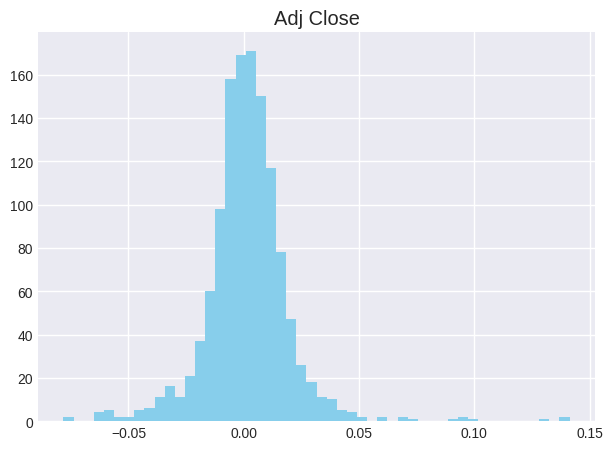

         Adj Close
count  1258.000000
mean      0.001591
std       0.018419
min      -0.078197
25%      -0.006546
50%       0.001303
75%       0.009932
max       0.141311


In [ ]:
import matplotlib.pyplot as plt
daily_pct_c.hist(bins=50, color='skyblue')
plt.show()

print(daily_pct_c.describe())


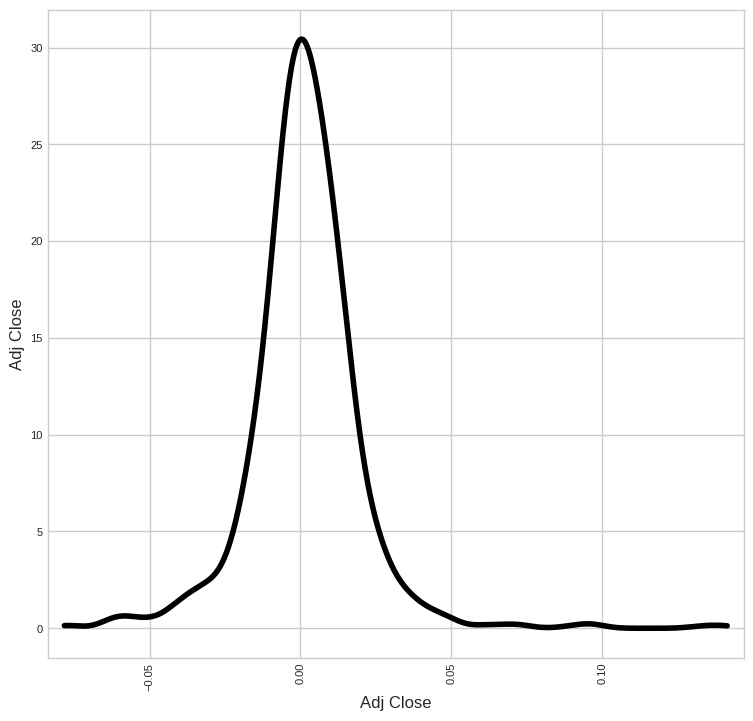

In [ ]:
pd.plotting.scatter_matrix(daily_pct_c, diagonal='kde', alpha=0.1,figsize=(8,8),colour = "skyblue")
plt.show()

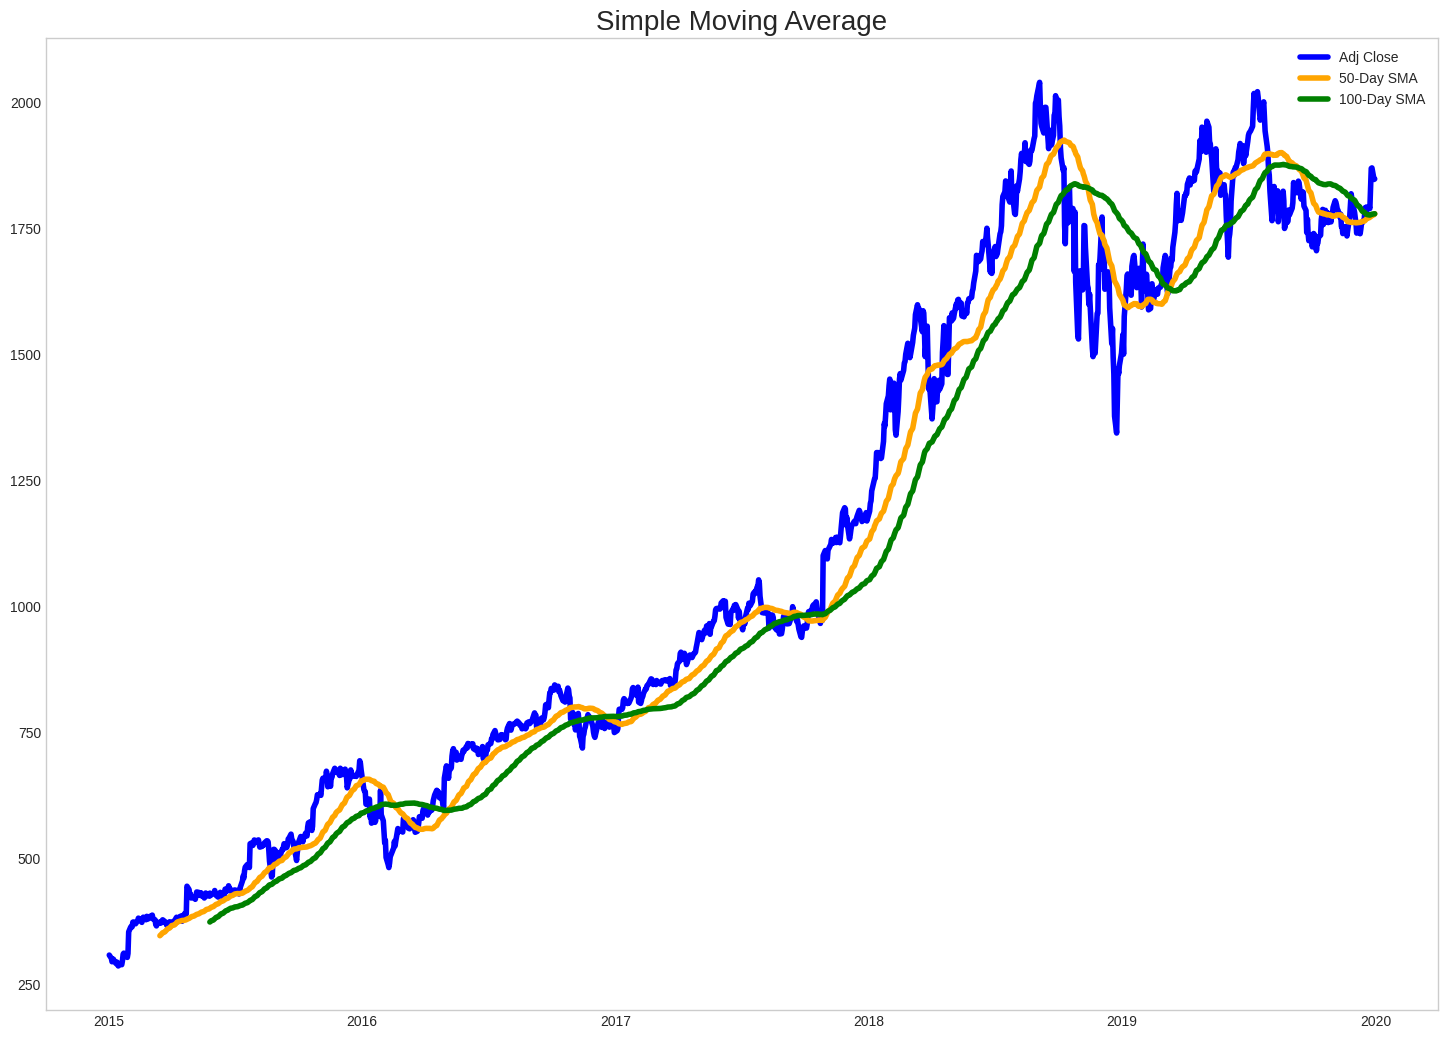

In [ ]:
import matplotlib.pyplot as plt

adj_close_px = amzn['Adj Close']
amzn['50'] = adj_close_px.rolling(window=50).mean()
amzn['100'] = adj_close_px.rolling(window=100).mean()

plt.figure(figsize=(16, 12))

plt.plot(amzn['Adj Close'], label='Adj Close', color='blue')
plt.plot(amzn['50'], label='50-Day SMA', color='orange')
plt.plot(amzn['100'], label='100-Day SMA', color='green')

plt.title('Simple Moving Average', fontsize=20)
plt.grid()
plt.legend()

plt.show()


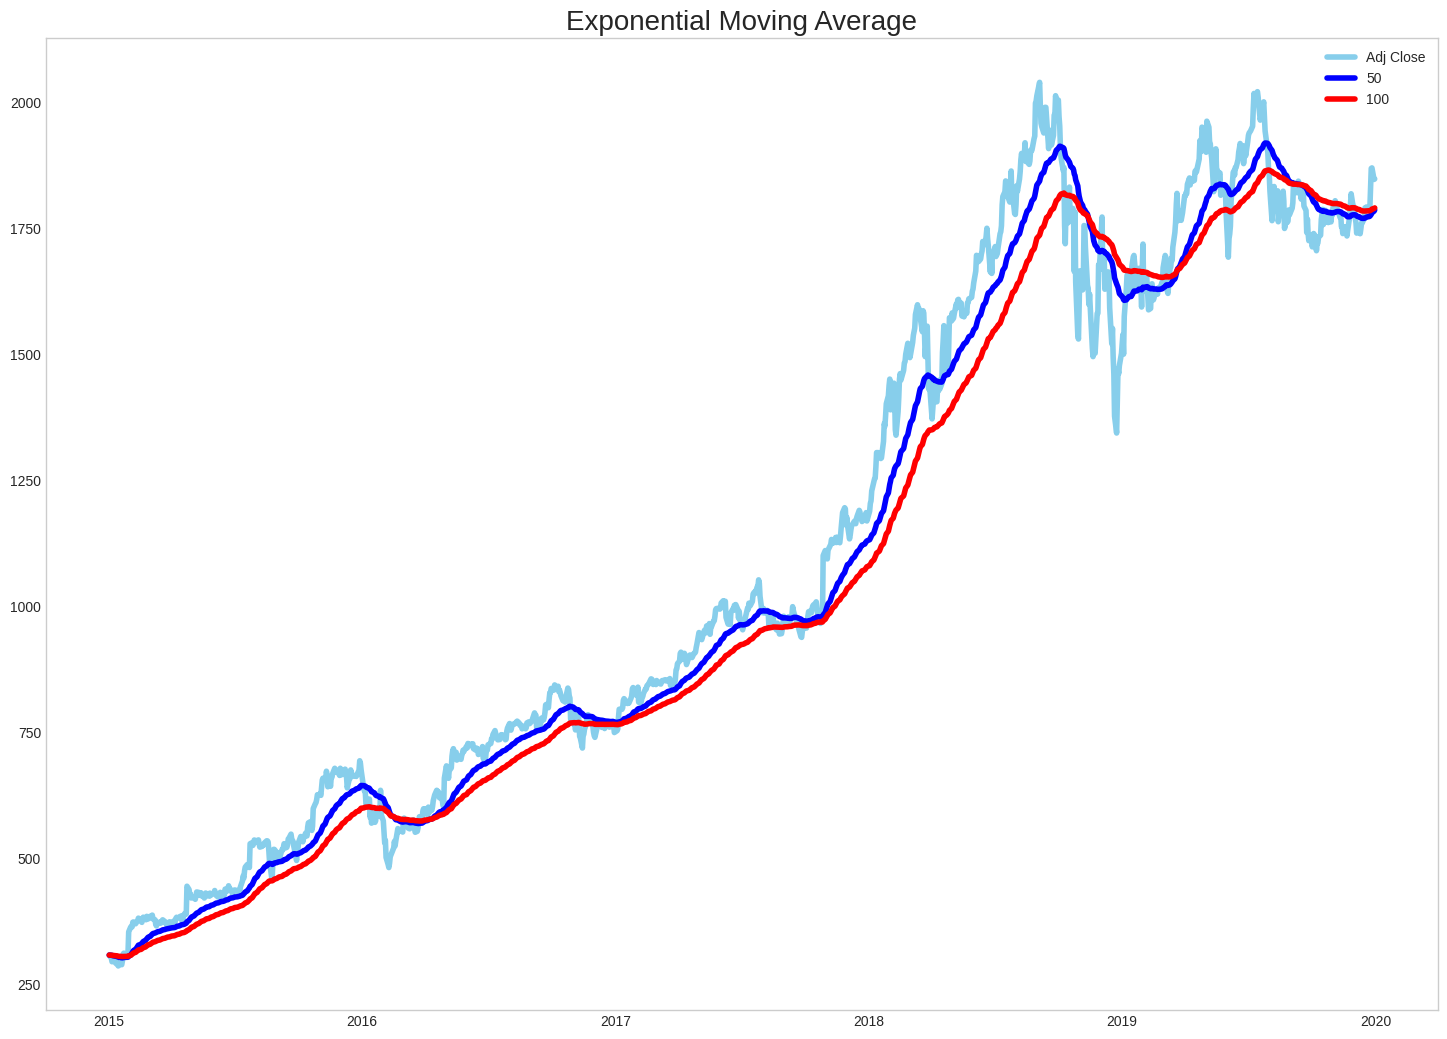

In [ ]:
plt.figure(figsize=(16,12))
plt.plot(adj_close_px, label='Adj Close',color = "skyblue")
plt.plot(adj_close_px.ewm(span=50, adjust=False).mean(), label='50',color = "blue")
plt.plot(adj_close_px.ewm(span=100, adjust=False).mean(), label='100',color = "red")
plt.title('Exponential Moving Average', fontsize=20)
plt.legend()
plt.grid()
plt.show()


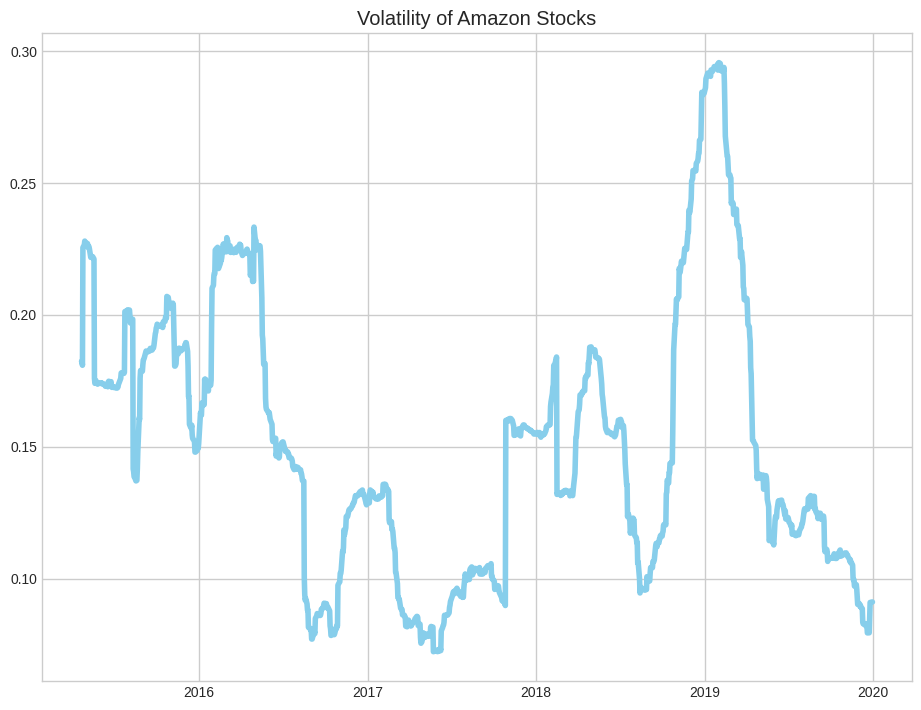

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

min_periods = 75
vol = daily_pct_c.rolling(min_periods).std() * np.sqrt(min_periods)

plt.figure(figsize=(10, 8))

plt.plot(vol, color='skyblue')
plt.title('Volatility of Amazon Stocks')

plt.show()


Trading strategy
Moving Average Crossover
Among short- and long-term EMAs, they discovered that trading the crossovers of the 13-day and 48.5-day averages produced the largest returns. Buying the average 13/48.5-day “golden cross” produced an average 94-day 4.90 percent gain, better returns than any other combination.

In [ ]:
short_window = 13
long_window = 49

signals = pd.DataFrame(index=amzn.index)
signals['signal'] = 0.0

signals['short_mavg'] = amzn['Close'].rolling(window=short_window, min_periods=1, center=False).mean()
signals['long_mavg'] = amzn['Close'].rolling(window=long_window, min_periods=1, center=False).mean()
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:]
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)

signals['positions'] = signals['signal'].diff()

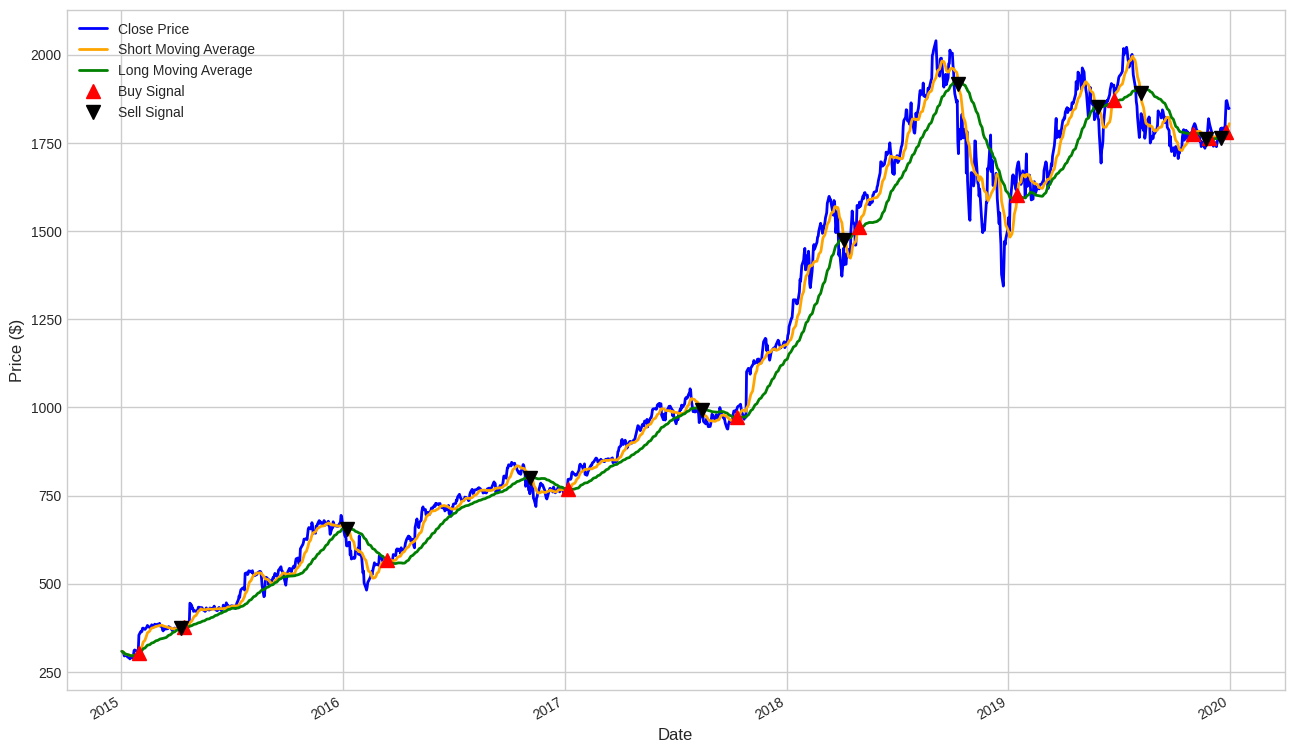

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 10))
ax1 = fig.add_subplot(111, ylabel='Price ($)')

amzn['Close'].plot(ax=ax1, lw=2., color='blue', label='Close Price')

signals['short_mavg'].plot(ax=ax1, lw=2., color='orange', label='Short Moving Average')
signals['long_mavg'].plot(ax=ax1, lw=2., color='green', label='Long Moving Average')

ax1.plot(signals.loc[signals.positions == 1.0].index,
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='red', label='Buy Signal')

ax1.plot(signals.loc[signals.positions == -1.0].index,
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='black', label='Sell Signal')

ax1.legend()

plt.show()


In [ ]:
initial_capital= float(100000.0)
positions = pd.DataFrame(index=signals.index).fillna(0.0)
positions['AMZN'] = 100*signals['signal']
portfolio = positions.multiply(amzn['Adj Close'], axis=0)
pos_diff = positions.diff()
portfolio['holdings'] = (positions.multiply(amzn['Adj Close'], axis=0)).sum(axis=1)
portfolio['cash'] = initial_capital - (pos_diff.multiply(amzn['Adj Close'], axis=0)).sum(axis=1).cumsum()
portfolio['total'] = portfolio['cash'] + portfolio['holdings']
portfolio['returns'] = portfolio['total'].pct_change()

In [ ]:
portfolio.head()

,AMZN,holdings,cash,total,returns
Date,,,,,
2015-01-02,0.0,0.0,100000.0,100000.0,NaN
2015-01-05,0.0,0.0,100000.0,100000.0,0.0
2015-01-06,0.0,0.0,100000.0,100000.0,0.0
2015-01-07,0.0,0.0,100000.0,100000.0,0.0
2015-01-08,0.0,0.0,100000.0,100000.0,0.0


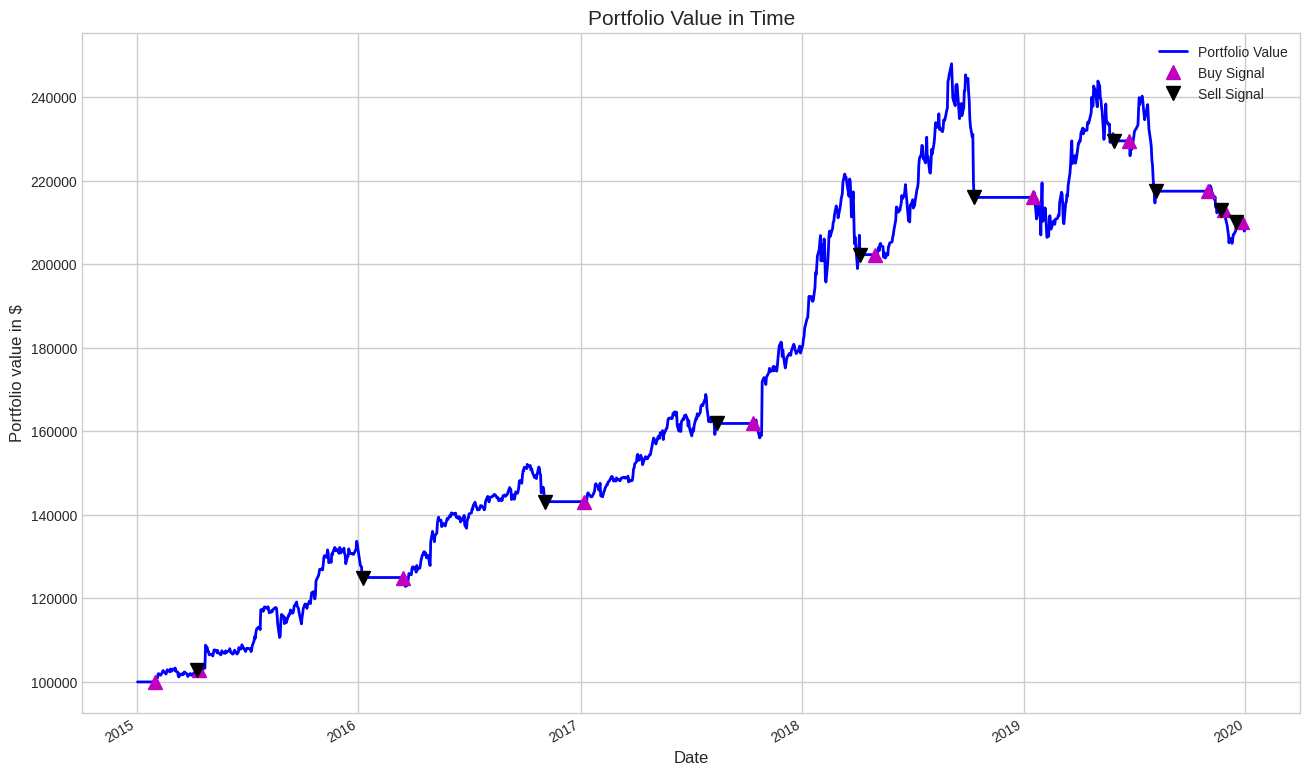

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 10))
ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

portfolio['total'].plot(ax=ax1, lw=2., color='blue', label='Portfolio Value')

ax1.plot(portfolio.loc[signals.positions == 1.0].index,
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m', label='Buy Signal')
ax1.plot(portfolio.loc[signals.positions == -1.0].index,
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k', label='Sell Signal')

plt.title('Portfolio Value in Time', fontsize=15)

ax1.legend()
plt.show()
